#Data Collection:

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

In [15]:
train_data = pd.read_csv('https://raw.githubusercontent.com/cran/titanic/master/inst/data-raw/train.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has missing values in the "age" and "cabin" columns.







## Age

In [17]:
age_sex = train_data.groupby(['Pclass','Sex']).mean()
age_sex =age_sex.reset_index()
age_sex=age_sex.drop(columns = ['PassengerId','Survived','SibSp','Parch','Fare'])
age_sex

<ipython-input-17-d72d28dbca1a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_sex = train_data.groupby(['Pclass','Sex']).mean()


,Pclass,Sex,Age
0,1,female,34.611765
1,1,male,41.281386
2,2,female,28.722973
3,2,male,30.740707
4,3,female,21.750000
5,3,male,26.507589


In [18]:
def mean_age (pclass , sex) :
  if pclass == 1 and sex == 'female':
    return 35
  elif pclass == 1 and sex == 'male':
    return 41
  elif pclass == 2 and sex == 'female':
   return 29
  elif pclass == 2 and sex == 'male':
   return 31
  elif pclass == 3 and sex == 'female':
   return 22
  elif pclass == 3 and sex == 'male':
   return 27



This function will assign the mean age, calculated based on sex and class, to the null ages

In [19]:
train_data['Age'] = train_data['Age'].fillna(train_data.apply(lambda row: mean_age(row['Pclass'], row['Sex']), axis=1))
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check for duplicate values

In [20]:
drop_duplicates= train_data.drop_duplicates()

print(f'',train_data.size)
print(f'', drop_duplicates.size)



 10692
 10692


The data does not have duplicate values.

In [21]:
import re
train_data['Status'] = train_data['Name'].apply(lambda x: re.search(r',\s*([^\s,.]+)', x).group(1) if re.search(r',\s*([^\s,.]+)', x) else None)
train_data['Status']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Status, Length: 891, dtype: object

#Exploratory Data Analysis (EDA)

##Data Visualization

Here we will analyze the plotting of graphs in a superficial way to better understand them.

In [22]:
import plotly.express as px


In [23]:
px.histogram(train_data, x='Survived')

In [24]:
px.histogram(train_data , x='Sex' , color='Survived', barmode='group')

In [25]:
px.histogram(train_data , x='Status' , color='Survived', barmode='group')

In [26]:
px.histogram(train_data , x='SibSp' , color='Survived', barmode='group')

So far so good...

In [27]:
px.histogram(train_data , x='Status' , color='Sex', barmode='group')

The correlation between 'status' and 'sex' is very high; this could interfere with the data.

In [28]:
px.histogram(train_data , x='Ticket' , color='Pclass', barmode='group')

The correlation between 'Ticket' and 'Pclass' is very high; this could interfere with the data.

**The same applies to "cabin" and "Pclass."**

***Will be removed from our analysis: cabin, ticket, name, and status.***

# Model Preprocessing

In [29]:
y=train_data['Survived']
x=train_data[['Age','Pclass','Sex','SibSp','Parch']]

* x=explanatory variables
* y=target variable

In [30]:
x['sex_encoded'] = x['Sex'].apply(lambda x: 1 if x == 'male' else 0)
x=x.drop(columns='Sex')
x.head(1)

<ipython-input-30-bc06e0a6a609>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Pclass,SibSp,Parch,sex_encoded
0,22.0,3,1,0,1


Defining "male" as 1 and "female" as 0

# Data Modeling

## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split as tts


In [32]:
x_train , x_test , y_train , y_test = tts(x,y , test_size=0.4 ,random_state=5 )

Splitting the data into train and test

##Dummy

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
dummy = DummyClassifier()
dummy.fit(x_train , y_train)
dummy.score(x_test,y_test)

0.6358543417366946

Using the dummy model to define what is a bad score

## Model Tree


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=100, random_state=5)

tree.fit(x_train,y_train)
tree.predict(x_test)
tree_result=tree.score(x_test, y_test)
tree_result

0.8263305322128851

### Tree - Confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predict = tree.predict(x_test)
confusion = confusion_matrix(y_test,y_predict)

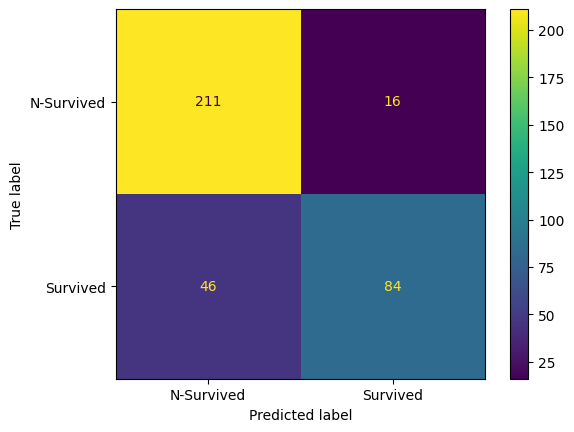

In [38]:
show = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['N-Survived','Survived'])
show.plot()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       227
           1       0.84      0.65      0.73       130

    accuracy                           0.83       357
   macro avg       0.83      0.79      0.80       357
weighted avg       0.83      0.83      0.82       357



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest=RandomForestClassifier(n_estimators = 100, max_depth = 5,random_state=5)
forest.fit(x_train,y_train)
forest.predict(x_test)
forest_result=forest.score(x_test, y_test)
forest_result

0.8291316526610645

### Forest - confusion matrix

In [42]:
y_predict = forest.predict(x_test)
confusion = confusion_matrix(y_test,y_predict)

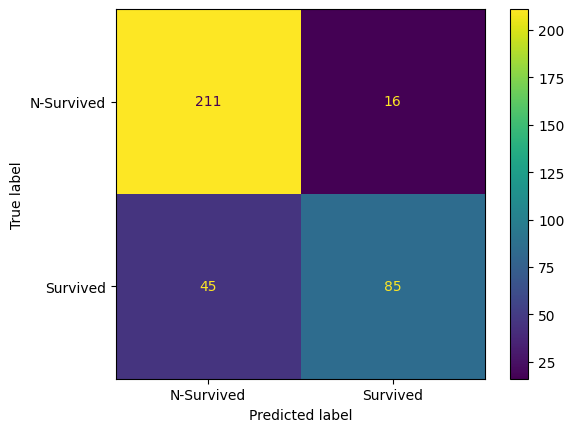

In [43]:
show = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['N-Survived','Survived'])
show.plot()

In [44]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       227
           1       0.84      0.65      0.74       130

    accuracy                           0.83       357
   macro avg       0.83      0.79      0.80       357
weighted avg       0.83      0.83      0.82       357



As the Random Forest score was better than the tree model, we use this model to predict survival.

#Test model


## importing and treating

In [45]:
test_data = pd.read_csv('https://raw.githubusercontent.com/cran/titanic/master/inst/data-raw/test.csv')
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [46]:
age_sex = test_data.groupby(['Pclass','Sex']).mean()
age_sex =age_sex.reset_index()
age_sex=age_sex.drop(columns = ['PassengerId','SibSp','Parch','Fare'])
age_sex

<ipython-input-46-488b3834ae1c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Pclass,Sex,Age
0,1,female,41.333333
1,1,male,40.520000
2,2,female,24.376552
3,2,male,30.940678
4,3,female,23.073400
5,3,male,24.525104


In [47]:
def mean_age (pclass , sex) :
  if pclass == 1 and sex == 'female':
    return 35
  elif pclass == 1 and sex == 'male':
    return 41
  elif pclass == 2 and sex == 'female':
   return 29
  elif pclass == 2 and sex == 'male':
   return 31
  elif pclass == 3 and sex == 'female':
   return 22
  elif pclass == 3 and sex == 'male':
   return 27



In [48]:
test_data['Age'] = test_data['Age'].fillna(train_data.apply(lambda row: mean_age(row['Pclass'], row['Sex']), axis=1))
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
x_test = test_data[['Age','Pclass','Sex','SibSp','Parch']]


In [50]:

x_test['sex_encoded'] = x_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
x_test=x_test.drop(columns='Sex')
x_test.head(1)

<ipython-input-50-46a558ad5c4f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Pclass,SibSp,Parch,sex_encoded
0,34.5,3,0,0,1


## Making predictions

In [51]:
y_test=forest.predict(x_test)

In [52]:
my_submission = pd.DataFrame(test_data['PassengerId'])
my_submission['Survived'] = y_test
my_submission.to_csv('my_submission.csv', index = False)

In [53]:
test1 = pd.read_csv('my_submission.csv')
test1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


According to Kaggle, this model has a 79.16% accuracy.